In [ ]:
# Heart Disease Prediction: Exploratory Data Analysis

This project focuses on exploring and analyzing a dataset containing information about patients to predict the likelihood of heart disease. The dataset includes various features such as age, sex, chest pain type, blood pressure, cholesterol levels, and other relevant medical data. By performing exploratory data analysis (EDA), we aim to understand the structure of the dataset, identify potential patterns, and prepare for building a predictive model.


In [2]:
# Importing relevant libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('heart_disease_prediction.csv')

# Display the first five rows of the dataframe
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Print out the number of features and observations in the dataset
num_features = df.shape[1]
num_observations = df.shape[0]

print(f"Number of features: {num_features}")
print(f"Number of observations: {num_observations}")


Number of features: 12
Number of observations: 918


In [5]:
# Print the number of features and observations in the dataset
num_features = df.shape[1]
num_observations = df.shape[0]

print(f"Number of features: {num_features}")
print(f"Number of observations: {num_observations}")

# Display basic information about the dataset
df.info()

# Display summary statistics for numerical features
df.describe(include=[np.number])


Number of features: 12
Number of observations: 918
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each feature:")
print(missing_values[missing_values > 0])


Missing values in each feature:
Series([], dtype: int64)


Categorical features:
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Distribution of Sex:
M    725
F    193
Name: Sex, dtype: int64


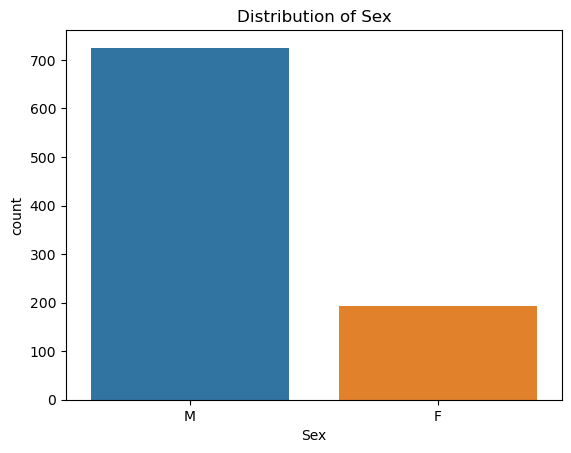


Distribution of ChestPainType:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


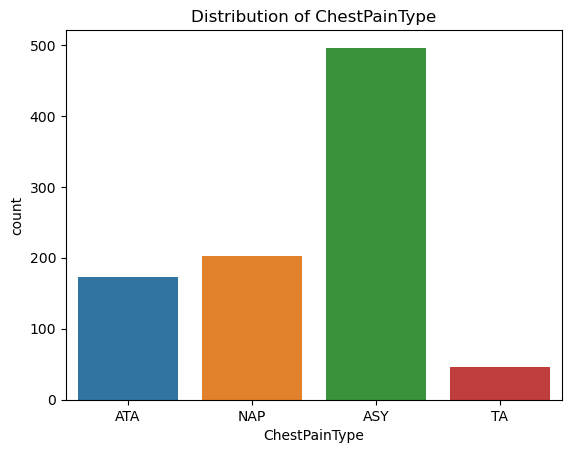


Distribution of RestingECG:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


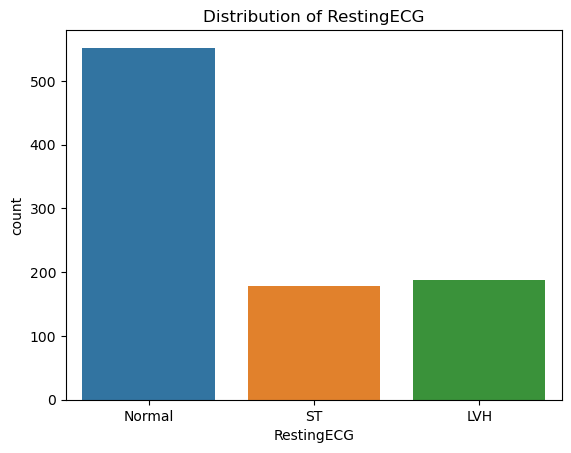


Distribution of ExerciseAngina:
N    547
Y    371
Name: ExerciseAngina, dtype: int64


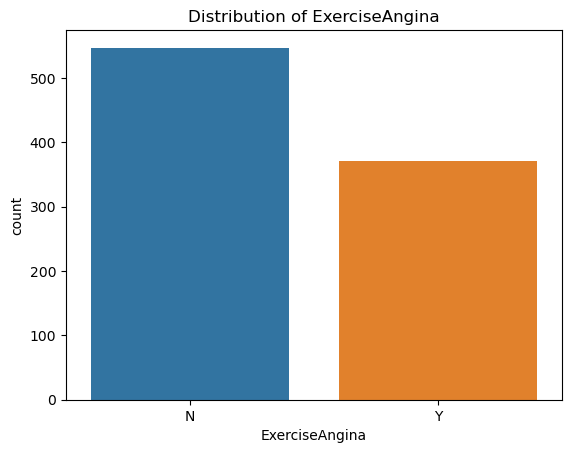


Distribution of ST_Slope:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


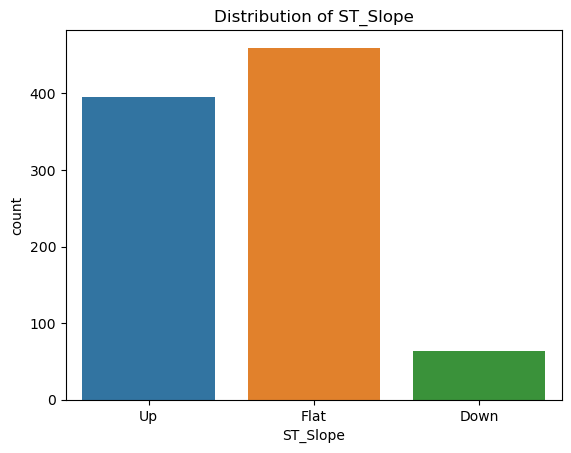

In [7]:
# Analyze the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical features:")
print(categorical_features)

for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts())
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()


Numerical features:
Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


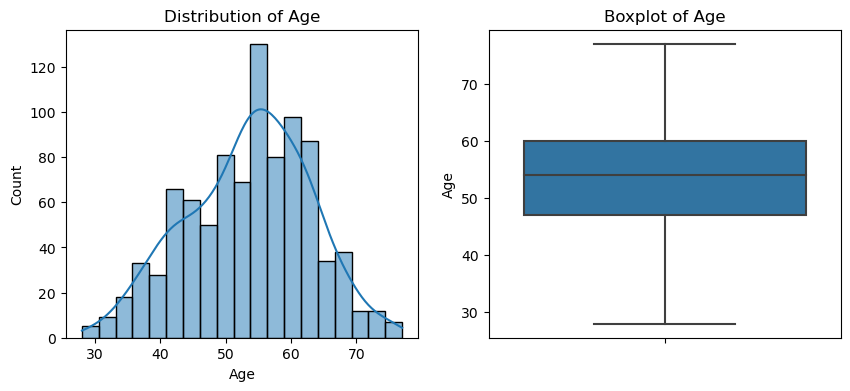

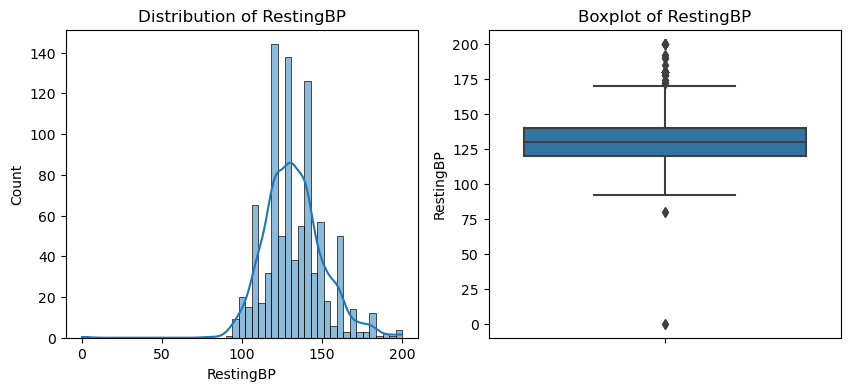

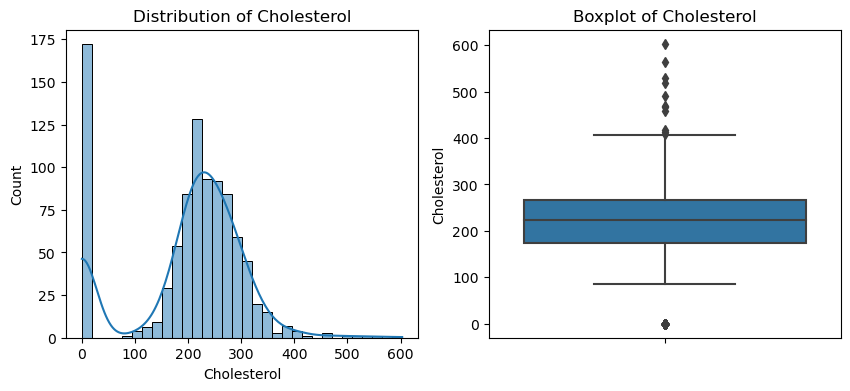

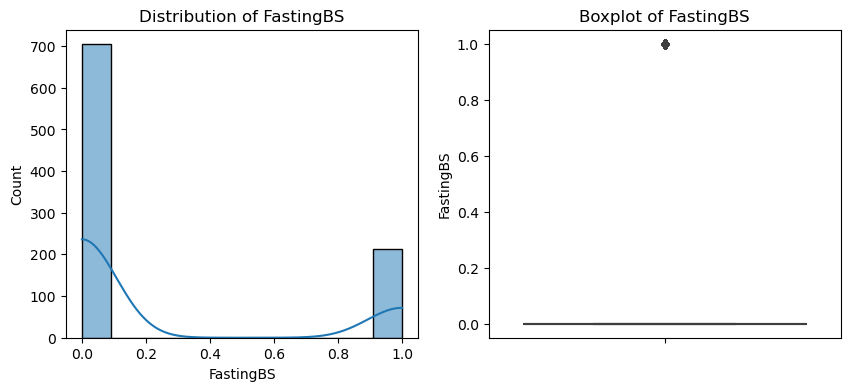

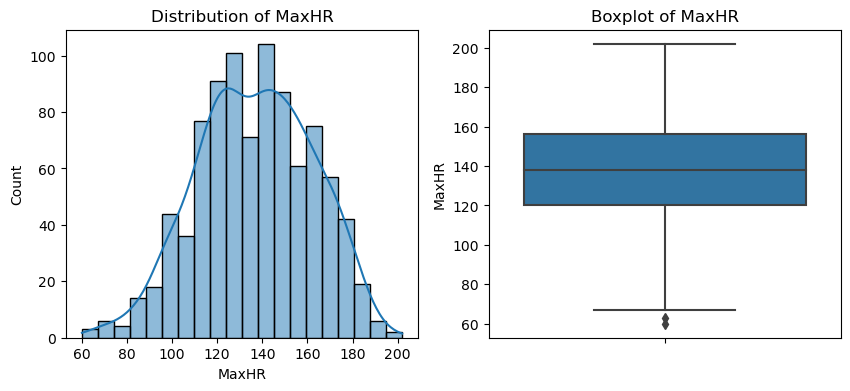

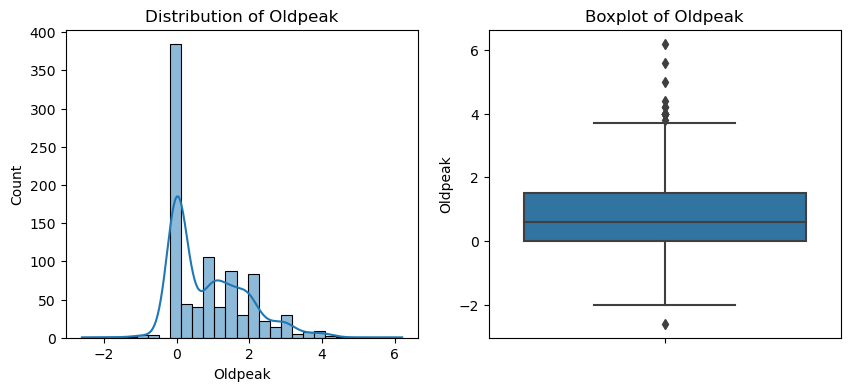

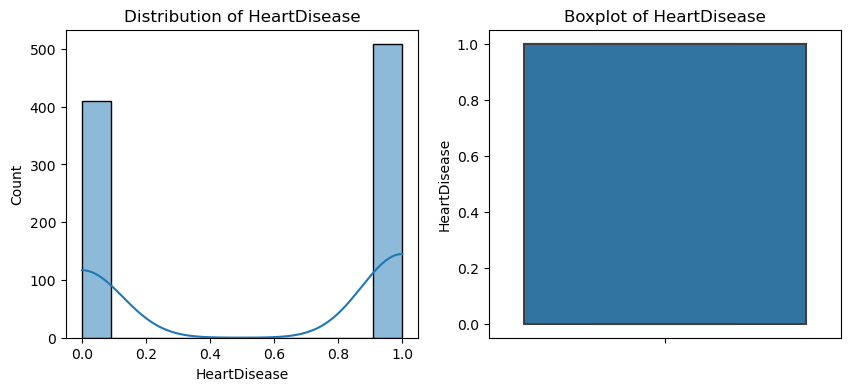

In [8]:
# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
print("Numerical features:")
print(numerical_features)

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    
    plt.show()


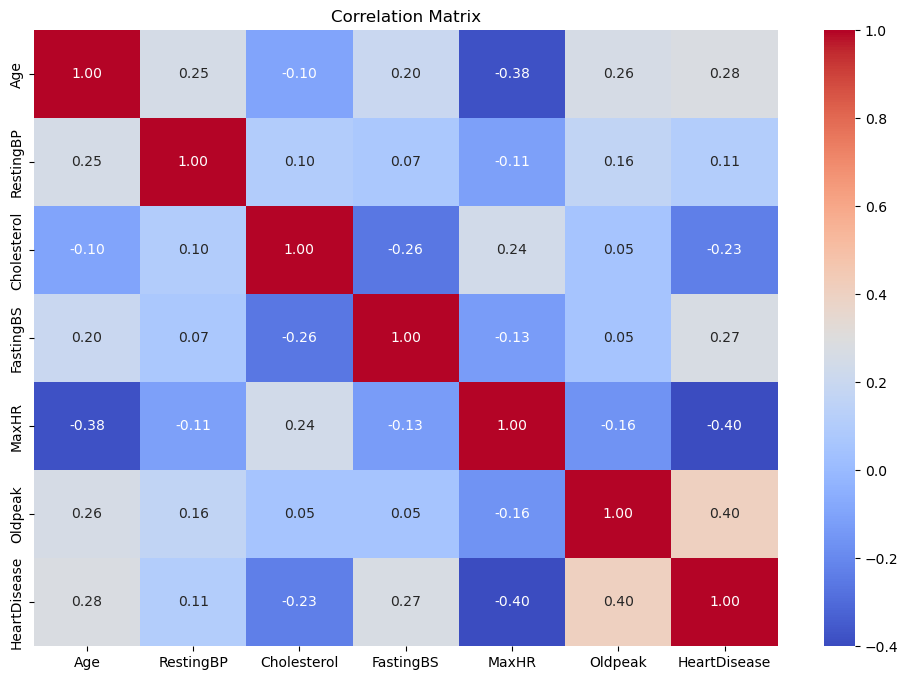

Correlation with HeartDisease:
HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


In [9]:
# Compute and visualize correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print("Correlation with HeartDisease:")
print(correlation_with_target)


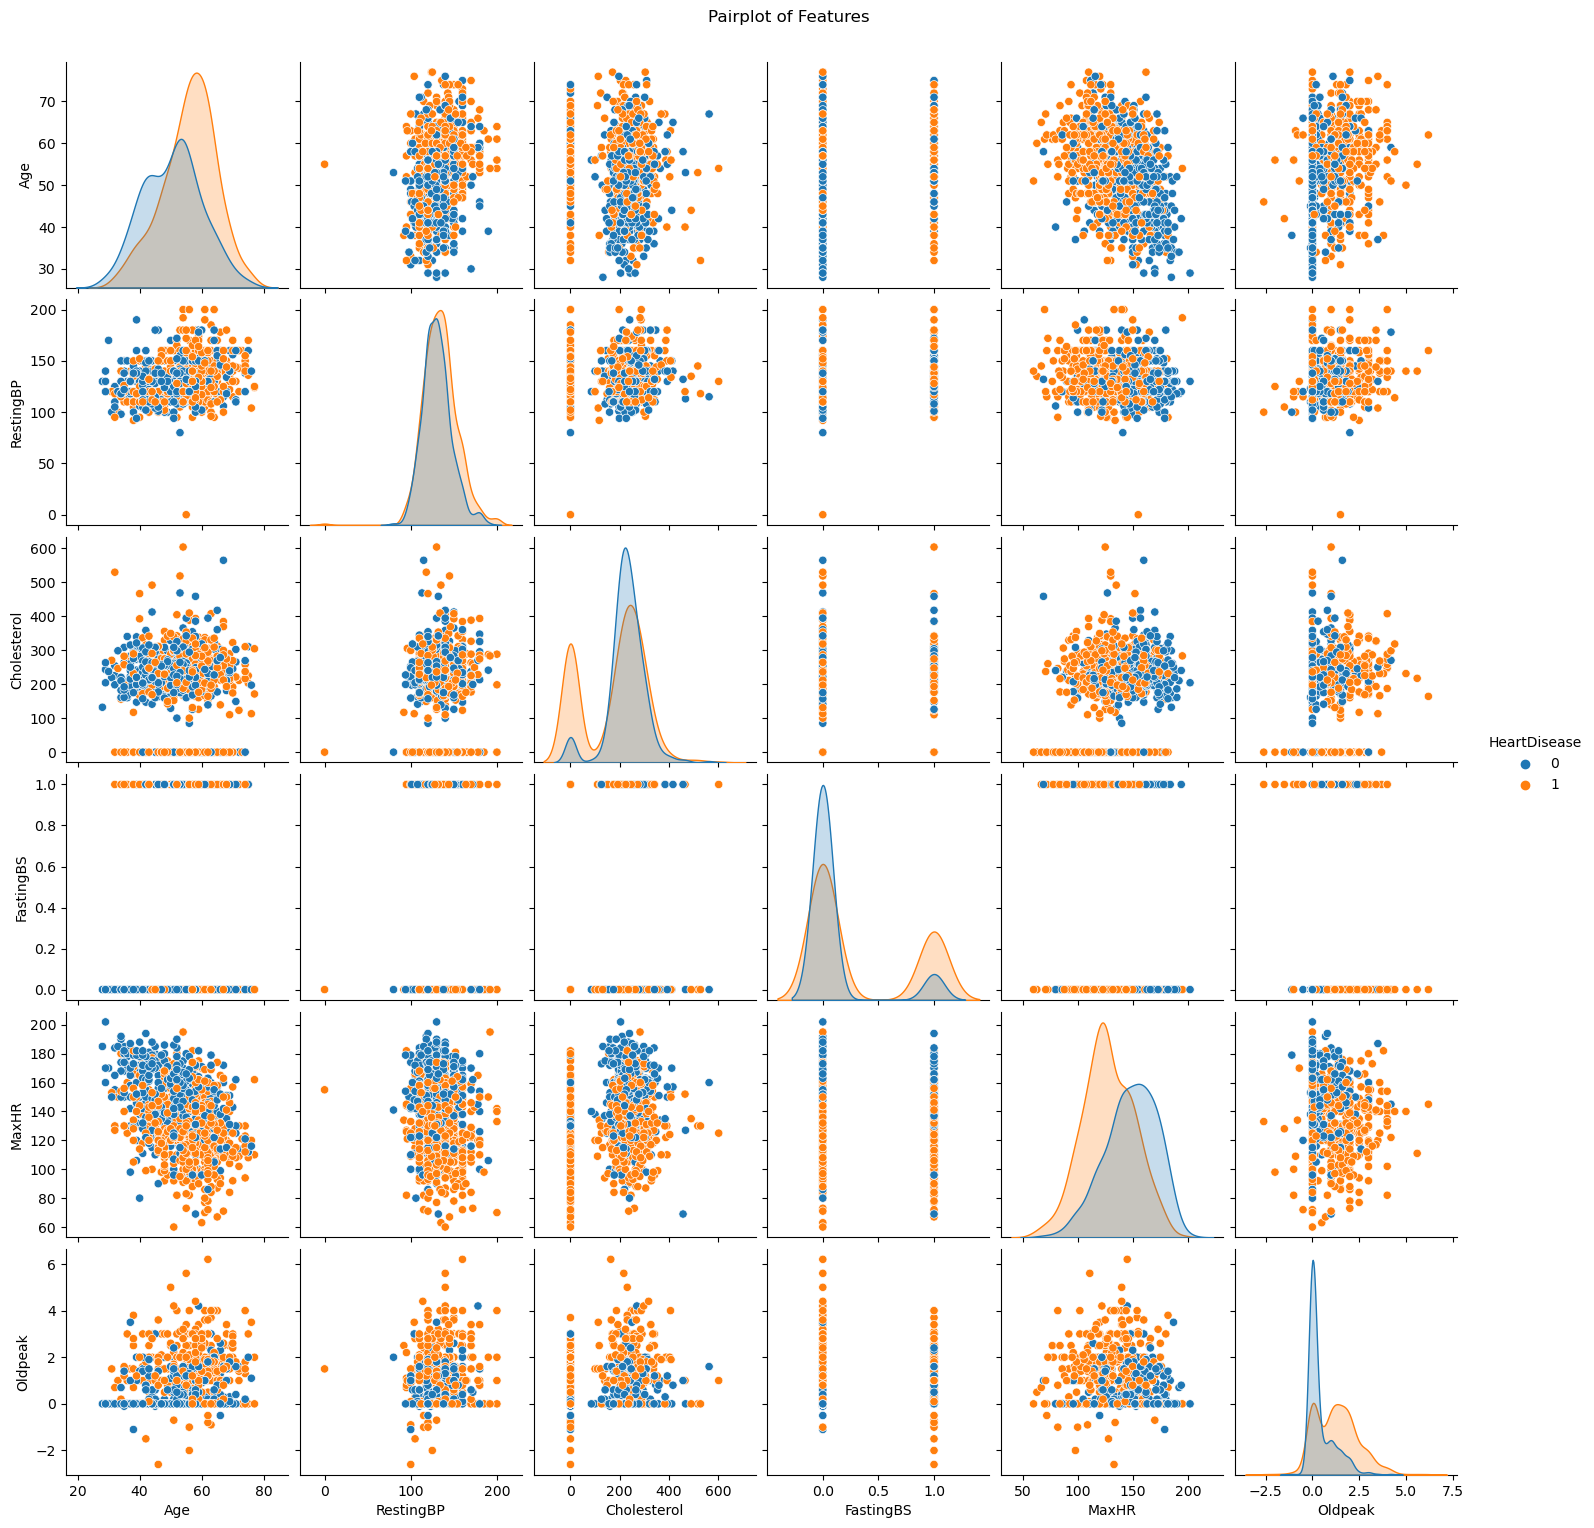

In [11]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df, hue='HeartDisease', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()